# Influence functions for data mis-labelling

Both data mis-labelling and outlier detection target the same problem, they are operating on discrete and continuous values, respectively. A influence function $I(x_1, x_2) \colon \mathbb{R}^n \times \mathbb{R}^n \to \mathbb{R} $ measures the influence of the data point $x_1$ onto $x_2$ conditioned on the training targets $y_1$ and $y_2$. As long as the loss function $L(x, y)$ is differentiable (or can be approximated by a surrogate objective). Imagine a simple classification problem, where $y_i \in \{1, \dots, K\}$, the goal is now to find labels which are mislabelled.

## Artificial data generation

First we generate a K-class, M-dimensional dataset using a Gaussian mixture model (GMM). This can be done by sampling $N$ data points from a discrete distribution.

In [16]:
from valuation.utils import Dataset
from sklearn.model_selection import train_test_split

import numpy as np

N = 1000
K = 3
M = 2

gaussian_mean = np.random.normal(size=[K, M])
y = np.random.randint(K, size=N)
x = np.random.normal(size=[N, M]) + gaussian_mean[y]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70)
dataset = Dataset(
    x_train,
    y_train,
    x_test,
    y_test
)

## Plotting the training and the test data

In the following we plot the training as well as the test set side by side.

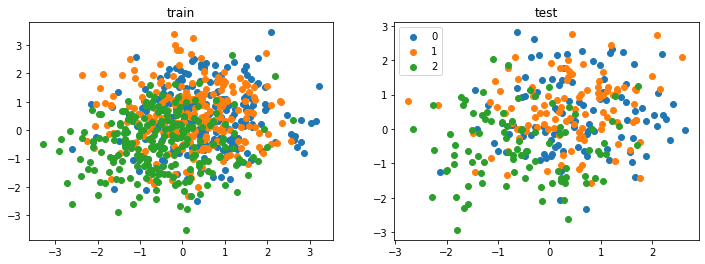

In [21]:
import matplotlib.pyplot as plt

datasets = {
    'train': (dataset.x_train, dataset.y_train),
    'test': (dataset.x_test, dataset.y_test)
}
num_datasets = len(datasets)
fig, ax = plt.subplots(1, num_datasets, figsize=(12, 4))

for i, dataset_name in enumerate(datasets.keys()):
    x, y = datasets[dataset_name]
    ax[i].set_title(dataset_name)

    for v in np.unique(y):
        idx = np.argwhere(y == v)
        ax[i].scatter(x[idx, 0], x[idx, 1], label=str(v))


plt.legend()
plt.show()


## Calculating linear influences using logistic regression

